# Классификация

**Задача классификации:**  <br /> 
У нас есть объекты, классы которых нам известны. 
Например, у вымышленного интернет-магазина есть три категории клиентов:"консерваторы", "экспериментаторы" и "случайные клиенты".
И, соответственно, есть клиентская база, о каждом клиенте известно, к какой категории (классу) он принадлежит. 

Также имеются объекты, классы которых неизвестны. Например, это могут быть недавние клиенты.
Задача классификации заключается в построении правила, умеющего классифицировать объекты по классам по имеющейся информации.

Это задача обучения с учителем - мы заранее знаем разметку данных и будем по ней. 

**Типы классов:** <br />
- Бинарная: два класса
- Многоклассовая: от 3 и более классов


- Непересекающиеся классы
- Пересекающиеся классы
- Нечеткие классы

## Алгоритмы. 


### Метод k-ближайших соседей

В метрическом пространстве (т.е. в таком, в котором введено понятие расстояния) есть объекты, классы которых нам известны. Есть также объекты, классы которых нам неизвестны, но они в пространстве расположены в окружении объектов с известными классами. 

Идея следующая: объекты из одного класса будут "близко" расположены, поэтому всякому неизвестному объекту присвоим класс его ближайших соседей. 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png"> 

Нужно:
- определиться, сколько соседей мы будем учитывать
- каким образом будем определять близость/схожесть объектов

### Случайный лес
Алгоритм классификации на основе решающих деревьев. 

Решающее дерево - это средство поддержки принятия решений. Представляет собой древовидную структуру:
- в узлах записаны атрибуты, по которым различаем случаи
- по ребрам переходим к следующим атрибутам
- в листах записан класс объекта

Чтобы классифицировать объект по решающему дереву, нужно пройти от корня до листа, проверяя в каждом узле условия. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png">

Случайный лес - это ансамблевый метод:
1. Генерируем подвыборку с повторениями из объектов размера N.
2. Строим решающее дерево.
3. Повторяем процедуру. 

Классификация объектов проводится путём голосования: каждое дерево комитета относит классифицируемый объект к одному из классов, и побеждает класс, за который проголосовало наибольшее число деревьев.

Оптимальное число деревьев подбирается таким образом, чтобы минимизировать ошибку классификатора на тестовой выборке. В случае её отсутствия, минимизируется оценка ошибки out-of-bag: тех образцов, которые не попали в обучающую подвыборку за счёт повторений

## А хороший ли у нас классификатор? Метрики


![](http://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)


**Доля правильных ответов (accuracy)**: $$AC = \frac {TP + TN}{TP + FP + TN + FN} $$

**Точность (precision)**: $$P = \frac{TP}{TP + FP}$$

**Полнота (recall)**: $$R = \frac{TP}{TP + FN}$$

Точность показывает, какая доля объектов, выделенных классификатором как положительные, действительно является положительными.

Полнота показывает, какая часть положительных объектов была выделена классификатором


**F-measure**: $$F = \frac{1}{\alpha\frac{1}{P} + (1 - \alpha)\frac{1}{R}}$$

**True Positive Rate**: $$TPR = \frac{TP}{TP + FN}$$

**False Positive Rate**: $$FPR = \frac{FP}{FP + TN}$$


TPR полностью совпадает с полнотой, и показывает долю верно предсказанных классов у объектов, относящихся к положительному классу.

FPR — это доля неправильно предсказанных классов среди объектов отрицательного класса.




## Скоринг как пример классификации

Задача скоринга сводится к тому, что определяется, выдать кредит заемщику или нет. <br /> 
Это задача бинарной классификации:
- класс 1: кредит выдан
- класс 2: в кредите отказано

В качестве основного источника данных используем <a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)"> публично доступный датасет </a>  в немного измененном виде. 

Значение признаков: 

- account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
- duration: на какой период запрашивают кредит
- credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
- amount: на какую сумму запрашивают кредит
- savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4: >= 1000)
- employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
- guarantors: 1 - есть поручители, 0 - нет
- residence: сколько лет резидент
- age: возраст, деленный на 100
- credits_number: число кредитов
- job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
- maintenance_people: число людей, которых обеспечивает заемщик
- telephone: указан ли телефон (1: да, 0: нет)
- foreign: 1: иностранец, 0: нет
- real_estate: 1: есть недвижимость, 0: нет недвижимости
- life_insurance: 1: оформлено страхование жизни, 0, нет страховки
- car: 1: есть автомобиль, 0: нет автомобиля
- housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
- sex: пол - 1: муж., 0: жен.
- purpose: на какую цель запрашивают кредит (из нескольких вариантов)
- target: 1: кредит выдан, 0: в кредите отказано


Итак, **наша задача**:

Научиться относить людей к одному из двух классов, чтобы принимать решения по клиентам в будущем. 

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
scorData = pd.read_excel("https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true")
scorData.head(5)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0


In [28]:
scorData.isnull().sum()

account               0
duration              0
credit_history        0
amount                0
savings               0
employment            0
guarantors            0
residence             0
age                   0
credits_number        0
job                   0
maintenance_people    0
telephone             0
foreign               0
real_estate           0
life_insurance        0
car                   0
housing_rent          0
sex                   0
purpose               0
target                0
dtype: int64

В датасете есть столбец с категориальной переменной, нужно её обработать. Также нам нужно разделить столбец с целевой переменной, в которой записаны классы, от таблицы с признаками. 


Поэтому в перменную **X** запишем матрицу объект-признак, в переменную **y** запишем класс объекта

In [ ]:
scorData = pd.concat([
    scorData.drop(['purpose'], axis=1), 
    pd.get_dummies(scorData.purpose, drop_first=True)
], axis=1)

In [34]:
X = scorData.drop(['target'], axis=1)
y = scorData['target']
# Посмотрим на размерности получившихся таблиц
X.shape, y.shape

((600, 28), (600,))

In [35]:
#перед разбиением перетасовываем данные
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

In [36]:
print('Состав  обучающей выборки:', y_train.value_counts(), '\n')
print('Состав тестовой выборки:', y_test.value_counts(), '\n')
print('Размер матрицы объект-признаки обучающей выборки: ', X_train.shape)
print('Размер целевой переменной обучающей выборки:', y_train.shape)

Состав  обучающей выборки: 1    222
0    198
Name: target, dtype: int64 

Состав тестовой выборки: 0    102
1     78
Name: target, dtype: int64 

Размер матрицы объект-признаки обучающей выборки:  (420, 28)
Размер целевой переменной обучающей выборки: (420,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
clf_KNN = KNeighborsClassifier() 
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
y_predKNN = clf_KNN.predict(X_test)
accuracy_score(y_test, y_predKNN)

0.6166666666666667

In [40]:
print('Предсказания классификатора:')
print(y_predKNN[:20])
print('Действительные классы:')
print(y_test[:20])

Предсказания классификатора:
[0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1]
Действительные классы:
434    0
122    1
224    1
479    0
205    0
569    0
432    1
526    1
439    1
162    0
315    1
400    0
173    0
283    0
48     1
457    0
482    0
85     0
187    1
365    1
Name: target, dtype: int64


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf_RF = RandomForestClassifier(random_state=0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
y_predRF = clf_RF.predict(X_test)
accuracy_score(y_test, y_predRF)

0.6722222222222223

In [ ]:
featureImportance = pd.DataFrame({"feature": df.drop('Survived',axis=1).columns, 
                                  "importance": clf_RF.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

## Качество результатов и подбор параметров

В примерах выше каждый раз мы пользовались техникой отложенной выборки: часть данных не использовали в обучении, но проверяли на них качество построенной модели по какой-либо метрике. 

Также в рассмотренных задачах нам попадались параметры, которые мы ставили либо наугад, либо доверяли дефолтным значениям. На практике используется **кросс-валидация** или метод скользящего контроля. В библиотеке scklearn представлено <a href = "http://scikit-learn.org/stable/modules/cross_validation.html">несколько подходов</a> к кросс-валидации.

In [44]:
scorData = pd.read_excel("https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true")
X = scorData[scorData.columns[:-2]]
y = scorData['target']

#normalized_X = preprocessing.normalize(X)
#from sklearn import preprocessing
#normalized_X = preprocessing.normalize(X)
#standardized_X = preprocessing.scale(X)

### Оптимальное число соседей в kNN
Попробуем подобрать оптимальное число соседей для классификатора. В примере использовано дефолтное значение 5 соседей. Вдруг это мало? Или много?

In [45]:
#импортируем функцию
from sklearn.model_selection import cross_val_score

В эту функцию мы передаем:
- модель
- матрицу объект-признак
- метки
- метрику, по которой будем строить оценку
- каким образом мы хотим делать кросс-валидацию

Самая популярная стратегия кросс-валидации - это K-Fold
<img src ="https://im0-tub-ru.yandex.net/i?id=46f84cf02b6c16b864f2ef0cab47e123&n=13">

In [46]:
rangeList = list(range(1,100))
scoreListMean = []
scoreListStd = []

for k in rangeList:
    knn = KNeighborsClassifier(n_neighbors = k)
    cap_score = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
    scoreListMean.append(cap_score.mean())
    scoreListStd.append(cap_score.std())

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

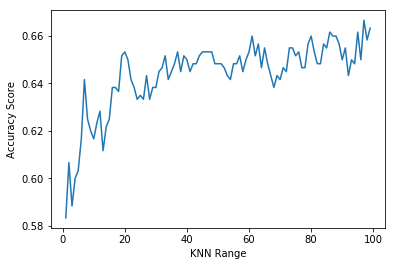

In [48]:
plt.plot(rangeList, scoreListMean, label = 'Mean accuracy')
#plt.plot(rangeList, scoreListStd, label = 'STD accuracy')
plt.xlabel('KNN Range')
plt.ylabel('Accuracy Score')
plt.show()

## Задание по классификации. 

Скачайте данные (файл train.csv) из датасета о пассажирах на Титанике:
https://www.kaggle.com/c/titanic/data

1) Разбейте выборку на обучающую и тестовую в соотношении 80/20 <br />
2) Постройте классификатор kNN по обучающей выборке. Найдите оптимальное число соседей (протестируйте варианты от 3 до 50 соседей), использую стратегию 7-Fold валидации и в качестве метрики качества используйте точность<br />
3) Постройте классификатор Random Forest по обучающей выборке. <br />
4) Напишите функцию для расчета точности классификации.<br />
5) Посчитайте точность классификации по тестовой выборке по двум моделям. Прокомментируйте результаты. 